#Land Use Land Cover Map of Denton County using Support Vector Machine

#**Abstract**
This study explores the dynamic interaction between land use and land cover (LULC) in Denton County, Texas, employing Google Earth Engine (GEE) and Jupyter Notebook for image classification. Utilizing the National Agriculture Imagery Program (NAIP) data, the project focuses on creating a detailed Land Use Land Cover map. The integration of Python libraries, including ee and geemap, facilitates cloud-based computation, enhancing efficiency in handling large datasets. The Support Vector Machine (SVM) algorithm is employed for image classification, demonstrating its effectiveness in delineating diverse land cover types. Denton County, within the Dallas-Fort Worth metropolitan area, serves as an ideal study area, given its varied landscape, including residential areas, open spaces, forests, and water bodies. The study showcases the power of remote sensing techniques, emphasizing their utility for monitoring and mapping land use land cover changes in a rapidly evolving region. The combination of GEE and Jupyter Notebook proves instrumental, providing a comprehensive and efficient approach for researchers and practitioners engaged in planetary-scale environmental data analysis. Despite the project's achievements, the classification results presented certain limitations, including misclassifications and feature omissions. To address these challenges, the exploration of more advanced classification methods, such as neural networks and integrated approaches, is suggested.

#**Introduction**
A given spatial region's landscape is defined by its land use and land cover (LULC) combinations. These two terminologies stood differently in their definition. Land cover to the physical and biological entities covering the surface of the earth including vegetation, water bodies, and bare land whereas land use refers to the use of land by humans for any purpose which includes residential area, agricultural land, and industrial area (Liping et al., 2018; Fonji & Taff, 2014). Global LULC change has a substantial effect on ecosystems, biodiversity, biological cycles, and the environment (Ellis & Pontius, 2006). Furthermore, sustainable development and land use land cover change (LULCC) are closely related concepts. At the local or global levels, land cover change (LCC) plays a critical role in climate change. The change in landscape is studied by means of analyzing the land use and land cover change. Remote sensing technologies are the most common approach for determining land use and land cover change (Fonji & Taff, 2014).

Google Earth Engien (GEEe is a cloud-based platform for planetary-scale environmental data analysis .With a dedicated Code Editor for development, it provides a vast database of remote sensing data and offers analysis in Python and JavaScript via the Earth Engine API. By utilizing a range of datasets like Landsat, Sentinel, and National Agriculture Program (NAIP) users can carry out a variety of analysis, such as picture categorization, time series evaluations, and mapping land cover. Interactive exploration is made possible by visualization tools, and shared projects are made easier by collaborative capabilities. Google Earth Engine GEE() is a useful tool for scientists and researchers doing planetary-scale analyses since it has applications in climate studies, agriculture, environmental monitoring, and other fields.

Jupyter Notebook is an open-source, web-based interactive computing environment that facilitates the creation and sharing of documents containing live code, equations, visualizations, and narrative text. Python, R, and Julia are just a few of the computer languages that Jupyter supports. Its versatility makes it a top option for academics, data scientists, and instructors. Iterative and exploratory coding processes are made possible by the ability for users to develop and run code in cells. Markdown cells go beyond code to allow formatted text, graphics, and mathematical expressions to be incorporated, allowing story and computational aspects to be seamlessly integrated inside a single document. Jupyter Notebooks are a powerful tool for data analysis, machine learning experiments, and scientific research due to their real-time visuals and instant feedback. Additionally, the ability to convert notebooks to several formats promotes cooperation and the sharing of knowledge.

With this study, I used the image inventory of Google Earth Engine (GEE) and jupyter notebook to do land use land cover classification of Denton County. The objective of this project was to prepare of Land Use Land Cover map of Denton county using National Agriculture Imagery Program (NAIP). Along with, I wanted to explore python libraries and methods essential for effective image classification. Though this classification can be done in software like ArcGIS and QGIS, but this program led to cloud based computation so that large data download for the classification is not required while working on inventory of Google Earth Engine (GEE). For this purpose, I used the python libraries ee which allows to interact with the Earth  Engine platform using python and geemap for doing geospatial analysis such as image classification Support Vector Machine (SVM) algorithm was used for image classification. Support Vector Machine (SVM) algorithms are powerful tools in the field of image classification. SVMs belong to the category of supervised machine learning algorithms, specifically designed for both classification and regression tas (Torabzadeh et al., 2014)..



#**Study Area**
Denton County is a county located in the U.S. state of Texas. Denton County is situated in the northern part of the state of Texas, within the Dallas-Fort Worth metropolitan area. It is part of the Dallas-Fort Worth-Arlington Metropolitan Statistical Area (DFW Metroplex). With the two public universities, University of North Texas and Texas Women’s University, the city has attracted people from different states and countries to live here. With the typical landcover type such as residential area, open spaces, forest, and water bodies, Denton is appropriate for land cover studies. As the Denton is growing, it became crucial to address the land cover change within several categories.  Ground based survey for determining land use land cover change is a costly and time-consuming approach. Use of remote sensing techniques is an effective and rapid way to monitor and map land use land cover change.

#**Data Required**
The study was focused on determining the land use land cover map of Denton County for year 2022 using National Agriculture Imagery Program (NAIP) images. The data is available for public. The NAIP orthophotos were acquired during the year 2022 agricultural growing season (April 2022 – December 2022) with a mix of leaf-on/leaf-off conditions throughout Texas by National Agriculture Imagery Program (Texas NAIP imagery .2020).

#**Project Design**
 This project was divided into two sections, first section consist of collecting the required orthophoto and training sample, and classification of the the image based on the training sample. This was done using Earth Engine (ee) and Google Earth Engine (geemap) python libraries. Different methods of ee and geemap were used in this section such as classification, validation, and interactive presentation of map. In second section, the classified image was provided with appropriate color, map layout and map components to prepare map . For this section, raterio and matplotlib along with their methods were used.



In [1]:
'''Following python libraries should be installed and imported to do image classification and map layout.
The program check if these libraries in the device and import the libraries otherwise installed and import them'''

try:
    import ee
    import geemap
    import rasterio as rio
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    from matplotlib.patches import Patch
    from matplotlib_scalebar.scalebar import ScaleBar

except:
    !pip install earthengine-api
    !pip install geemap
    !pip install rasterio
    !pip install matplotlib
    !pip install matplotlib-scalebar

    import ee
    import geemap
    import rasterio as rio
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    from matplotlib.patches import Patch
    from matplotlib_scalebar.scalebar import ScaleBar


In [2]:
# Authenticate to your Earth Engine account
#ee.Authenticate()

In [3]:
# Initialize the Earth Engine API
ee.Initialize()
# Load the FeatureCollections GEE assests and inventory
dataset = ee.ImageCollection('USDA/NAIP/DOQQ').filter(ee.Filter.date('2022-01-01', '2022-10-31')).median()
builtup = ee.FeatureCollection("projects/project-python-231204/assets/builtup")
farmland = ee.FeatureCollection("projects/project-python-231204/assets/farmland")
opensp = ee.FeatureCollection("projects/project-python-231204/assets/open_space")
trees = ee.FeatureCollection("projects/project-python-231204/assets/trees")
water = ee.FeatureCollection("projects/project-python-231204/assets/water")
denton = ee.FeatureCollection("projects/project-python-231204/assets/denton")
clipped_img = dataset.clip(denton)
Map = geemap.Map()

# Merge the FeatureCollections to create a composite class
classNames = builtup.merge(farmland).merge(opensp).merge(trees).merge(water)

# Add a random column to split data into training and validation sets
classNames = classNames.randomColumn()

# Set the split ratio
split = 0.7  # Roughly 70% training, 30% testing.

# Filter data for training and validation
train_arg1 = classNames.filter(ee.Filter.lt('random', split))
valid_arg1 = classNames.filter(ee.Filter.gte('random', split))

# Sample training data from the image
training = clipped_img.sampleRegions(
    collection=train_arg1,
    properties=['value'],
    scale=30
)

# Train a classifier using training data
classifier_denton = ee.Classifier.libsvm().train(training, 'value')

# Classify the image
classified_denton = clipped_img.classify(classifier_denton)

In [4]:
# Validate the classifier using the validation data
validation = clipped_img.sampleRegions(
    collection=valid_arg1,
    properties=['value'],
    scale=30
)
# Perform the validation
validated = validation.classify(classifier_denton)

# Get the error matrix comparing the validation data and the classified result
errorMatrix = validated.errorMatrix('value', 'classification')

# Print the error matrix
print('Error Matrix:', errorMatrix.getInfo())

# Print overall accuracy
accuracy = errorMatrix.accuracy()
overall_accuracy_value = accuracy.getInfo()
print('Overall Accuracy:', overall_accuracy_value)

Error Matrix: [[0, 0, 0, 0, 0, 0], [0, 24, 1, 1, 0, 4], [0, 1, 59, 3, 0, 2], [0, 0, 7, 44, 21, 9], [0, 0, 3, 8, 80, 1], [0, 0, 2, 4, 2, 56]]
Overall Accuracy: 0.7921686746987951


In [5]:
# Customize the color in of the classified image for interactive map
Map.addLayer(classified_denton, {'min': 0, 'max': 5, 'palette': ['#000000', '#0000FF', '#006400', '#FFFF00', '#00FFFF', '#ff0000']}, 'Classification Denton')
Map.setCenter(-97.16, 33.28, 10)

#Add legend on interactive map
legend_dict = {
    'Built up': '#ff0000',
    'Farmland': '#00FFFF',
    'Open Space': '#FFFF00',
    'Water': '#0000FF',
    'Trees': '#006400',
}
# Display the map
Map.add_legend(title="Land Cover Classification", legend_dict=legend_dict)
Map

Map(center=[33.28, -97.16], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

In [6]:
'''Export the map to google drive in a 'export' folder, it might take time. You can track the progress from tasks in google earth engine'''
geemap.ee_export_image_to_drive(classified_denton, description='lulc', folder='export', region=denton.geometry(), scale=10,)

"Export the map to google drive in a 'export' folder, it might take time. You can track the progress from tasks in google earth engine"

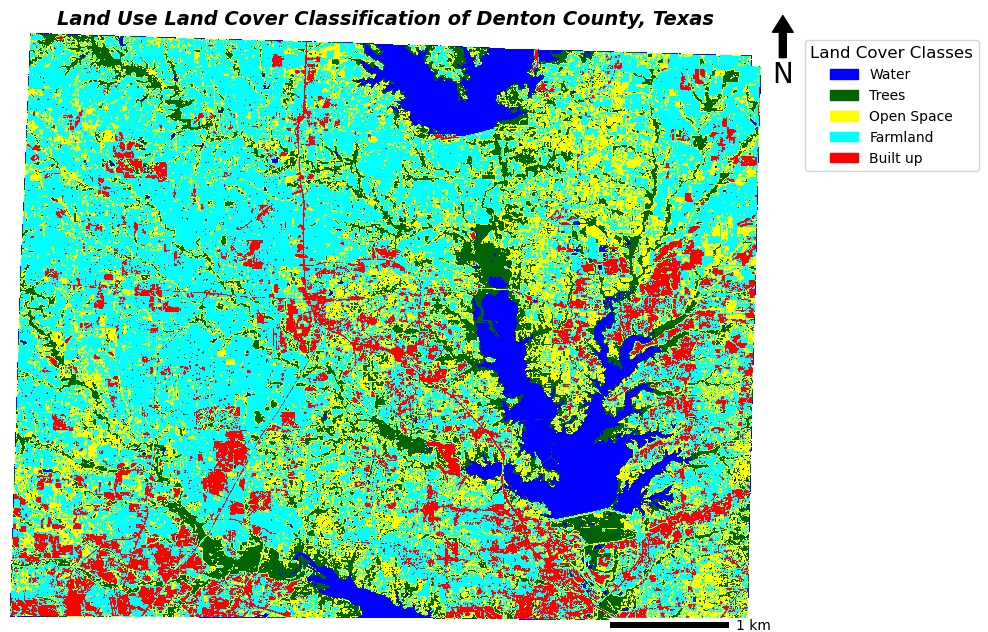

In [7]:
''' The classified image that is uploaded in the drive should be downloaded and placed in the same folder of jupyter notebook'''
# Open the raster file
with rio.open("lulc.tif", 'r+') as src:
    arr = src.read(1)

    # Custom colors for each class
    colors = ['#ffffff', '#0000FF', '#006400', '#FFFF00', '#00FFFF', '#ff0000']  # Add your custom colors here

    # Create a colormap from the custom colors
    cmap = ListedColormap(colors)

    # Plot your data using matplotlib
    f, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(arr, cmap=cmap)

    # Create a legend with custom labels and colors
    legend_labels = ["Water", "Trees", "Open Space", "Farmland", "Built up"]
    legend_patches = [Patch(color=color, label=label) for color, label in zip(colors[1:], legend_labels)]  # Exclude the background color

    # Add a title to the legend
    legend_title = "Land Cover Classes"
    legend = ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title=legend_title)

    # Customize the legend title appearance
    plt.setp(legend.get_title(), fontsize='12')

    plt.axis("off")
    #plt.title("Land Use Land Cover Classification of Denton County, Texas")
    plt.title("Land Use Land Cover Classification of Denton County, Texas", fontsize=14, fontweight='bold', fontstyle='italic')
    plt.tight_layout()

    # Add a north arrow to the top right corner rotated by 120 degrees clockwise
    x, y, arrow_length = 1.03, 1.03, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
    arrowprops=dict(facecolor='black', width=5, headwidth=15),
    ha='center', va='center', fontsize=20,
    xycoords=ax.transAxes)

    # # Add a scale bar shifted more to the right
    scalebar = ScaleBar(1, location='lower right', border_pad=-0.8, scale_loc="right",pad=0.05)  # Increase the pad value
    ax.add_artist(scalebar)

    # Save the figure to a local file
    plt.savefig("land_cover_map.png", bbox_inches='tight', pad_inches=0.1, dpi = 700)

    plt.show()



#**Limitations**
The classification process relies on an aerial image, and consequently, it hinges on the distinctive spectral signatures exhibited by various features. However, features that share similar spectral properties may be prone to misclassification, potentially leading to an inaccurate representation of the landscape. Furthermore, the spatial resolution of the image is set at 60 cm. Consequently, certain features may not be distinguishable at this resolution, resulting in potential omissions on the classified map.

#**Conclusion**
In summary, the Land Use Land Cover (LULC) map for Denton County in 2022 was generated utilizing NAIP imagery and training sample points. The project leveraged the image inventory from Google Earth Engine (GEE) and the geemap Python library for geospatial visualization and image classification. Additionally, matplotlib and rasterio Python libraries were employed for creating the map laout.
However, the classification results exhibit certain limitations, leading to misclassifications and omissions of features. To address these challenges, more advanced classification methods, such as neural networks and integrated approaches, could be explor (Prasai et al., 2021; Yan et al., 2015)ed. As a potential avenue for future work, implementing multiple data sources, including LiDAR data and aerial imagery, in conjunction with neural networks, may enhance the accuracy of the classification process. This could contribute to a more refined and comprehensive understanding of the landscape features in Denton County.

#**References**
Ellis, E., & Pontius, R. (2006). Land use and land cover change. Remote Sensing of Environment, 158, 295-310. https://doi.org/10.1016/j.rsase.2006.130045

Fonji, S. F., & Taff, G. N. (2014). Using satellite data to monitor land-use land-cover change in north-eastern latvia. SpringerPlus, 3(1), 61. https://doi.org/10.1186/2193-1801-3-61

Liping, C., Yujun, S., & Saeed, S. (2018). Monitoring and predicting land use and land cover changes using remote sensing and GIS techniques—A case study of a hilly area, jiangle, china. PLoS ONE, 13(7), e0200493. https://doi.org/10.1371/journal.pone.0200493

Prasai, R., Schwertner, T. W., Mainali, K., Mathewson, H., Kafley, H., Thapa, S., Adhikari, D., Medley, P., & Drake, J. (2021). Application of google earth engine python API and NAIP imagery for land use and land cover classification: A case study in florida, USA. Ecological Informatics, 66, 101474. https://doi.org/10.1016/j.ecoinf.2021.101474

Texas NAIP imagery . (2020, https://data.tnris.org/collection/?c=aa5183ca-a1bd-4b5f-9b63-4ba48d01b83d.

Torabzadeh, H., Morsdorf, F., & Schaepman, M. E. (2014). Fusion of imaging spectroscopy and airborne laser scanning data for characterization of forest ecosystems – A review. ISPRS Journal of Photogrammetry and Remote Sensing, 97, 25-35. https://doi.org/10.1016/j.isprsjprs.2014.08.001

United states geological survey (USGS). www.usgs.gov. https://www.usgs.gov/landsat-missions/landsat-1

Yan, W. Y., Shaker, A., & El-Ashmawy, N. (2015). Urban land cover classification using airborne LiDAR data: A review. Remote Sensing of Environment, 158, 295-310. https://doi.org/10.1016/j.rse.2014.11.001